<a href="https://colab.research.google.com/github/Trev621/AI/blob/main/HW5/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Trevor Lacoste
The purpose of this assignment is to use the GA package in Google Colab (R) to perform multi-objective engineering design optimization for a load-bearing I-beam.

In [2]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [3]:
# Loading the needed libraries

library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = 716.0153 
Solution = 
           x1       x2       x3       x4
[1,] 68.01296 48.43297 4.370555 4.751905

[1] "Best Solution:"
       x1        x2        x3        x4 
68.012964 48.432974  4.370555  4.751905 


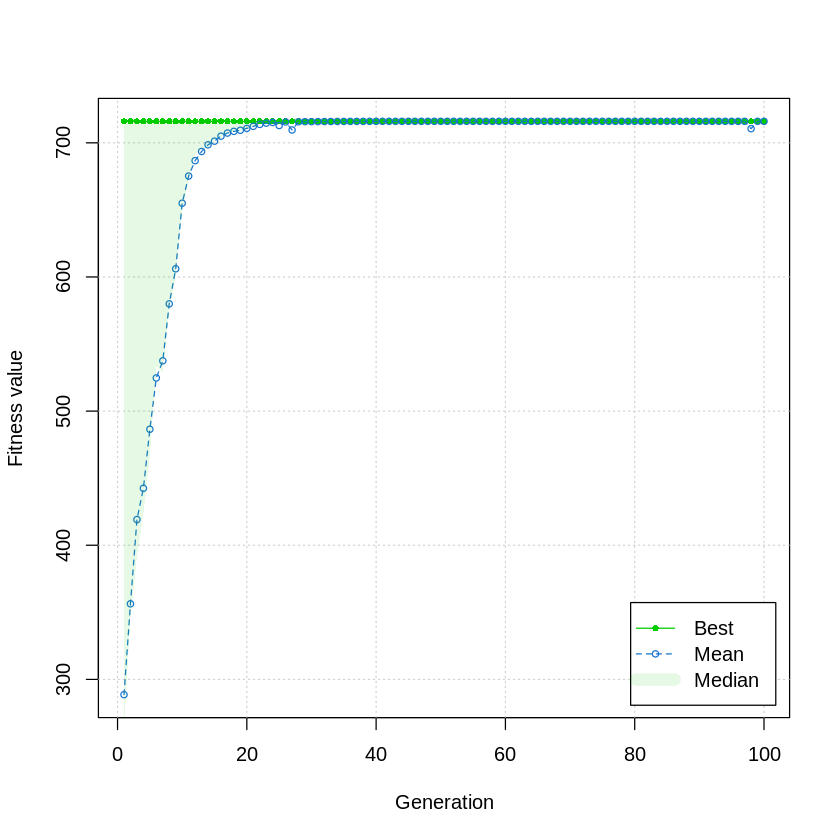

In [4]:
#  Define the function to be optimized
crossSection = function(x1, x2, x3, x4)
{
  (2*x2*x4) + x3*(x1-2*x4)
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = .1)
x2 = seq(10, 50, by = .1)
x3 = seq(0.9, 5.0, by = 0.1)
x4 = seq(0.9, 5.0, by = 0.1)

# Applied Genetic Algorithm
crossResult = ga(type = "real-valued",
        fitness = function(x) crossSection(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(crossResult)

plot(crossResult)

#Best solution
bestCross <- crossResult@solution[1,]

print("Best Solution:")
print(bestCross)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = 2.712614 
Solution = 
           x1       x2      x3       x4
[1,] 12.10311 17.91163 1.84692 1.834641

[1] "Best Solution:"
       x1        x2        x3        x4 
12.103106 17.911630  1.846920  1.834641 


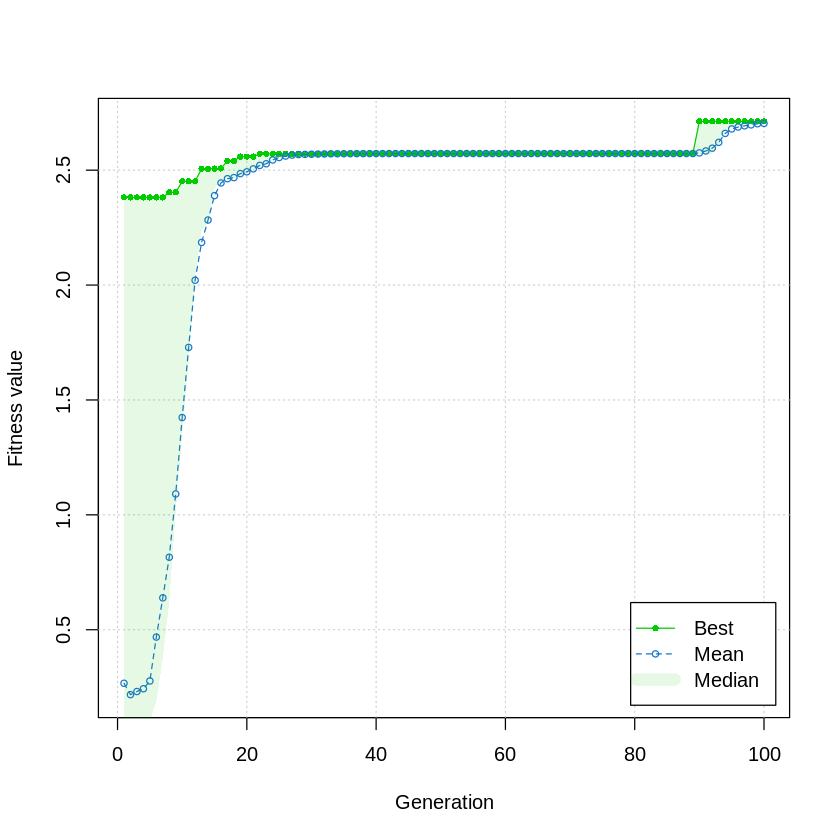

In [5]:
#  Define the function to be optimized
staticDeflection = function(x1, x2, x3, x4)
{
  (60000) / (x3*((x1 - 2*x4)^3) + 2*x2*x4*(4*(x4^2) + 3*x1*(x1 - 2*x4)))
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = 1)
x2 = seq(10, 50, by = 1)
x3 = seq(0.9, 5.0, by = 0.1)
x4 = seq(0.9, 5.0, by = 0.1)

# Applied Genetic Algorithm
staticResult = ga(type = "real-valued",
        fitness = function(x) staticDeflection(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(staticResult)

plot(staticResult)

#Best solution
bestStatic <- staticResult@solution[1,]

print("Best Solution:")
print(bestStatic)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = 323.7836 
Solution = 
           x1       x2       x3      x4
[1,] 71.92134 48.81362 4.051641 3.97836

[1] "Best Solution:"
       x1        x2        x3        x4 
71.921340 48.813615  4.051641  3.978360 


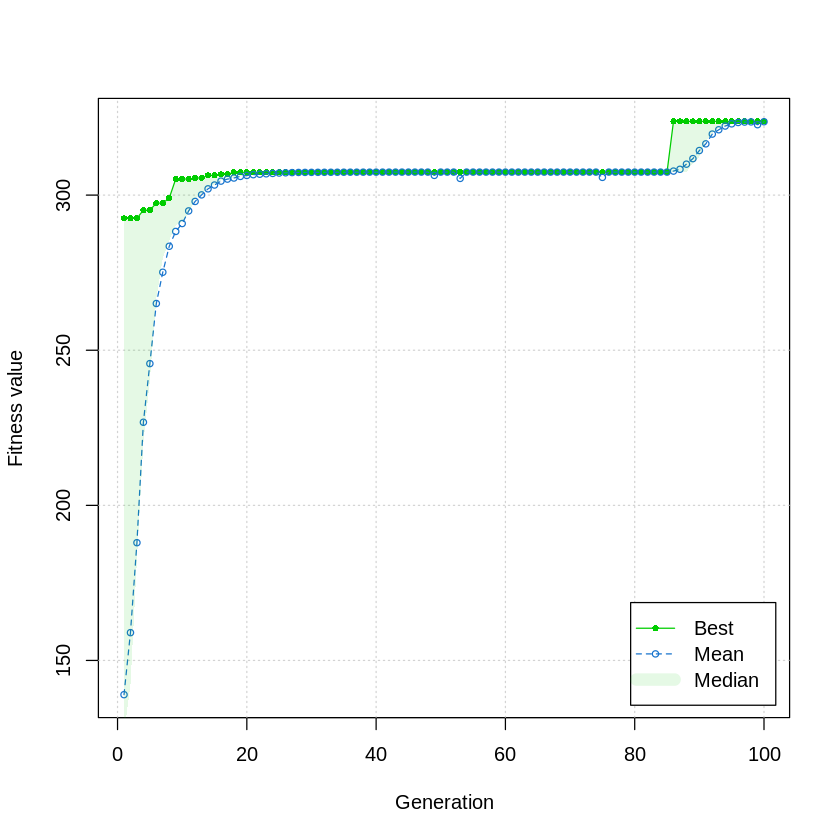

In [14]:
#Single equation where cross section and static deflection are equally important
equalAB <- function(x) {
  x1 <- x[1]
  x2 <- x[2]
  x3 <- x[3]
  x4 <- x[4]
  a <- .5
  b <- .5

  crossSection <- (2*x2*x4) + x3*(x1-2*x4)
  staticDeflection <- (60000) / (x3*((x1 - 2*x4)^3) + 2*x2*x4*(4*(x4^2) + 3*x1*(x1 - 2*x4)))

  return (a*crossSection + b*staticDeflection)
}


equalResult <- ga(type = "real-valued", fitness = equalAB,
              lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
              popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(equalResult)

plot(equalResult)

#Best solution
bestStatic <- equalResult@solution[1,]

print("Best Solution:")
print(bestStatic)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = 609.629 
Solution = 
           x1       x2       x3       x4
[1,] 72.87427 46.28623 4.668795 4.050341

[1] "Best Solution:"
       x1        x2        x3        x4 
72.874270 46.286229  4.668795  4.050341 


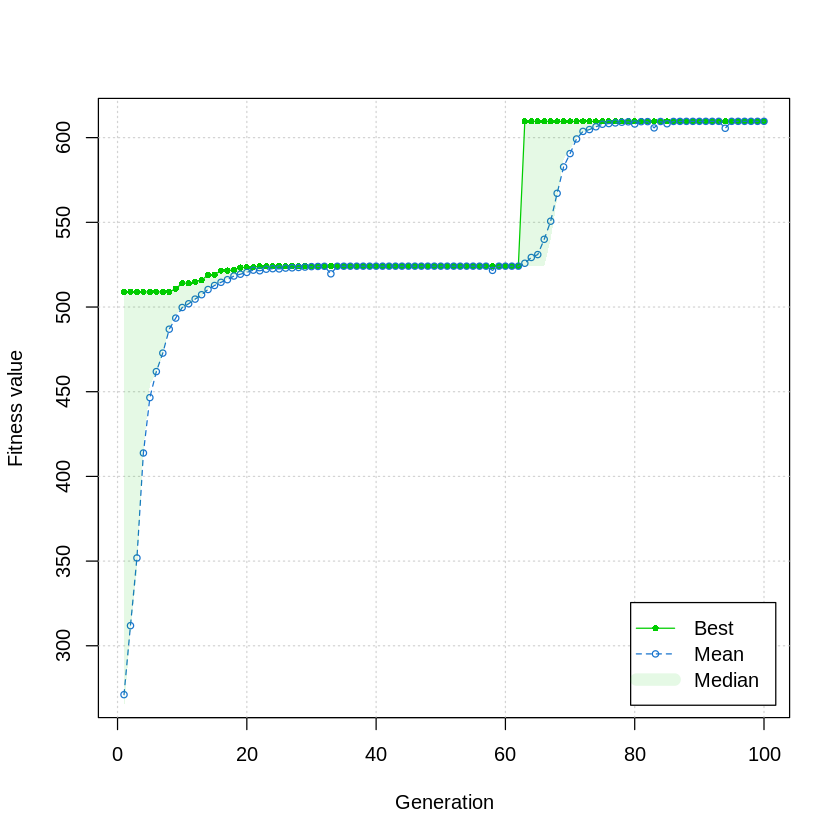

In [10]:
#Single equation where cross section is prioritized over static deflection
higherCross <- function(x) {
  x1 <- x[1]
  x2 <- x[2]
  x3 <- x[3]
  x4 <- x[4]
  a <- .9
  b <- .1

  crossSection <- (2*x2*x4) + x3*(x1-2*x4)
  staticDeflection <- (60000) / (x3*((x1 - 2*x4)^3) + 2*x2*x4*(4*(x4^2) + 3*x1*(x1 - 2*x4)))

  return (a*crossSection + b*staticDeflection)
}


higherCrossResult <- ga(type = "real-valued", fitness = higherCross,
              lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
              popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(higherCrossResult)

plot(higherCrossResult)

#Best solution
bestStatic <- higherCrossResult@solution[1,]

print("Best Solution:")
print(bestStatic)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = 71.49106 
Solution = 
          x1       x2       x3       x4
[1,] 77.1352 48.74584 3.943895 4.582752

[1] "Best Solution:"
       x1        x2        x3        x4 
77.135201 48.745843  3.943895  4.582752 


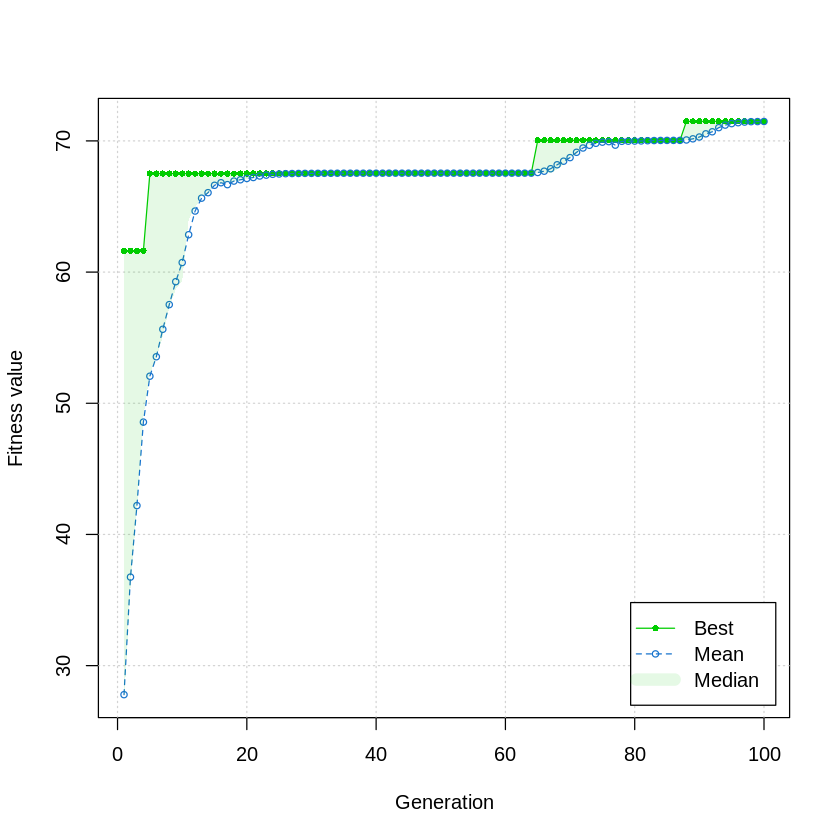

In [11]:
#Single equation where static deflection is prioritized over cross section
higherStatic <- function(x) {
  x1 <- x[1]
  x2 <- x[2]
  x3 <- x[3]
  x4 <- x[4]
  a <- .1
  b <- .9

  crossSection <- (2*x2*x4) + x3*(x1-2*x4)
  staticDeflection <- (60000) / (x3*((x1 - 2*x4)^3) + 2*x2*x4*(4*(x4^2) + 3*x1*(x1 - 2*x4)))

  return (a*crossSection + b*staticDeflection)
}


higherStaticResult <- ga(type = "real-valued", fitness = higherStatic,
              lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
              popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(higherStaticResult)

plot(higherStaticResult)

#Best solution
bestStatic <- higherStaticResult@solution[1,]

print("Best Solution:")
print(bestStatic)